In [11]:
import pandas as pd
import yfinance as yf

# Define the tickers for the 30 stocks
tickers = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "AMZN",  # Amazon
    "GOOGL", # Alphabet (Google) Class A
    "GOOG",  # Alphabet (Google) Class C
    "TSLA",  # Tesla
    "NVDA",  # Nvidia
    "JPM",   # JPMorgan Chase
    "V",     # Visa
    "UNH",   # UnitedHealth
    "HD",    # Home Depot
    "PG",    # Procter & Gamble
    "DIS",   # Disney
    "MA",    # Mastercard
    "PYPL",  # PayPal
    "BAC",   # Bank of America
    "ADBE",  # Adobe
    "NFLX",  # Netflix
    "CMCSA", # Comcast
    "XOM",   # Exxon Mobil
    "KO",    # Coca-Cola
    "CSCO",  # Cisco
    "VZ",    # Verizon
    "INTC",  # Intel
    "PEP",   # PepsiCo
    "PFE",   # Pfizer
    "WFC",   # Wells Fargo
    "ABT"    # Abbott Laboratories
]

print(tickers)


# Download stock price data
data = yf.download(tickers, start='2019-01-01', end='2024-01-01')['Adj Close']


['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'TSLA', 'NVDA', 'JPM', 'V', 'UNH', 'HD', 'PG', 'DIS', 'MA', 'PYPL', 'BAC', 'ADBE', 'NFLX', 'CMCSA', 'XOM', 'KO', 'CSCO', 'VZ', 'INTC', 'PEP', 'PFE', 'WFC', 'ABT']
[*********************100%***********************]  28 of 28 completed


In [12]:
correlation_mat=data.corr()

In [13]:
# Utility function to print the name of companies with their assigned cluster
def print_clusters(df_combined,cluster_labels):
  cluster_dict = {}
  for i, label in enumerate(cluster_labels):
      if label not in cluster_dict:
          cluster_dict[label] = []
      cluster_dict[label].append(df_combined.columns[i])

  # Print out the companies in each cluster
  for cluster, companies in cluster_dict.items():
      print(f"Cluster {cluster}: {', '.join(companies)}")

from sklearn.cluster import KMeans

# Perform k-means clustering with four clusters
clustering = KMeans(n_clusters=4, random_state=0).fit(correlation_mat)

# Print the cluster labels
cluster_labels=clustering.labels_
print_clusters(data,cluster_labels)

Cluster 0: AAPL, ABT, BAC, CSCO, GOOG, GOOGL, HD, JPM, MA, MSFT, NVDA, PG, TSLA, V
Cluster 3: ADBE, AMZN, CMCSA, NFLX
Cluster 1: DIS, INTC, PYPL, VZ
Cluster 2: KO, PEP, PFE, UNH, WFC, XOM


/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


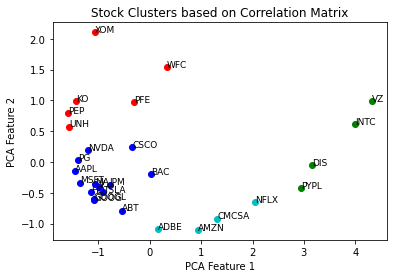

In [14]:
from sklearn.decomposition import PCA

# Initialize PCA and reduce to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(correlation_mat)

import matplotlib.pyplot as plt

# Extract the x and y coordinates
x_coords = reduced_data[:, 0]
y_coords = reduced_data[:, 1]

# Define colors (you can choose different color schemes)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot each point and color it according to its cluster label
for i in range(len(x_coords)):
    plt.scatter(x_coords[i], y_coords[i], color=colors[cluster_labels[i]])

# Optionally, add labels for each point (stock ticker)
for i, ticker in enumerate(data.columns):
    plt.text(x_coords[i], y_coords[i], ticker, fontsize=9)

# Set chart title and labels
plt.title('Stock Clusters based on Correlation Matrix')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Show the plot
plt.show()
